## 1

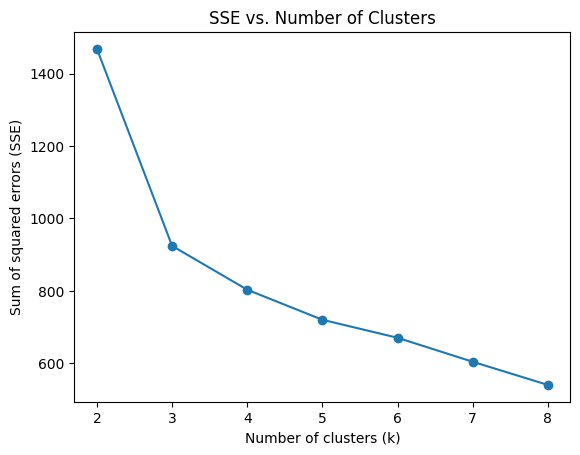

In [7]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv("accounts.csv")
data = data.drop_duplicates().dropna()  # Remove duplicates and null values
data = pd.get_dummies(data, drop_first=True)
X = data.iloc[:, :8]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

sse = []
for k in range(2, 9):  # k = 2, 3, 4, ..., 8
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # Inertia represents the sum of squared distances

# Plot the SSE for each k
plt.plot(range(2, 9), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('SSE vs. Number of Clusters')
plt.show()



## 1 b)
As you increase the number of clusters, inertia decreases, but the rate of decrease slows down after a certain point. The “elbow” in the plot, where this slowdown happens, indicates the optimal number of clusters. Adding more clusters beyond this point does not significantly reduce inertia, meaning it likely introduces unnecessary complexity.
Based on the plot from 1 a), we conclude that 3 clusters are optimal, as the "elbow" point in the chart occurs at k=3. This suggests that adding more clusters beyond this point provides diminishing returns in reducing inertia.



## 1 c)

In the “accounts.csv” file, the first 8 columns contain 2 numerical and 6 categorical variables. Since k-modes is specifically designed for categorical data, and the majority of our variables are categorical, k-modes would be a more appropriate choice than k-means for clustering this dataset. K-means is better suited for purely numerical data, while k-modes effectively handles categorical data by using mode-based centroids and matching distance, making it more suitable for this case.


## 2 a)


In [25]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


data = pd.read_csv("accounts.csv")
data = data.iloc[:, :8]
data = data.drop_duplicates().dropna()  # Remove duplicates and null values
data = pd.get_dummies(data, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
print(f'Variance explained by the top 2 components: {explained_variance}')
print(f'Cumulative variance explained by top 2 components: {explained_variance.sum()}')
print(round(explained_variance.sum() * 100,2), "percent of variability is explained by the top 2 components")



Variance explained by the top 2 components: [0.11679024 0.11075988]
Cumulative variance explained by top 2 components: 0.22755012102819194
22.76 percent of variability is explained by the top 2 components


Silhouette Score: 0.47029671814635


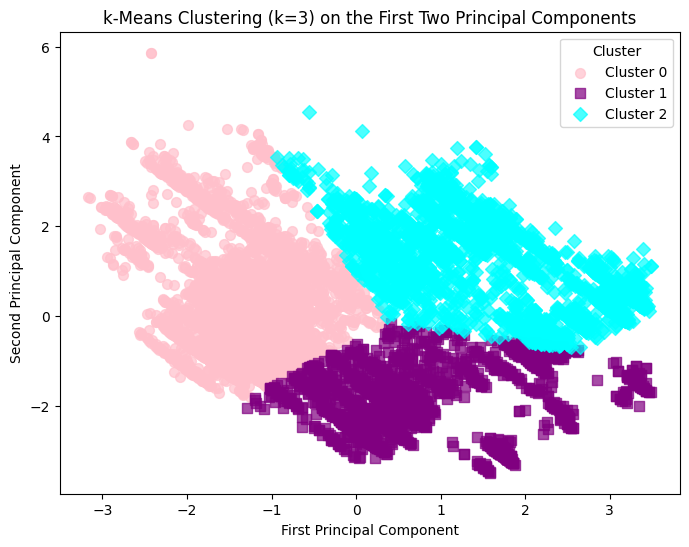

In [30]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA  # Make sure to import PCA

# Load and preprocess the data
data = pd.read_csv("accounts.csv")
data = data.drop_duplicates().dropna()  # Remove duplicates and null values
data = data.iloc[:, :8]
X = pd.get_dummies(data, drop_first=True)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Unique markers for each cluster
markers = ['o', 's', 'D']  # Use different markers like 'o' (circle), 's' (square), 'D' (diamond)

# Unique colors for each cluster
colors = ['pink', 'purple', 'cyan']  # Define a unique color for each cluster

# Plot the clusters
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(np.unique(clusters)):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], 
                color=colors[i], marker=markers[i], label=f'Cluster {cluster}', s=50, alpha=0.7)

plt.title('k-Means Clustering (k=3) on the First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.show()

Although there is some overlap between the clusters, the scatter plot and a silhouette score of 0.47 suggest that the clusters can be considered moderately well-separated. The score indicates that while there is some structure in the data, there is still room for improvement in cluster definition. Therefore, we can conclude that the clusters show potential for separation, but further refinement could enhance their distinctiveness.

<Figure size 1200x800 with 0 Axes>

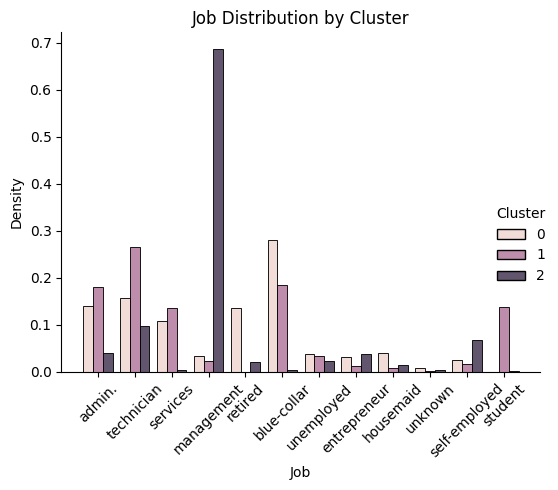

<Figure size 1200x800 with 0 Axes>

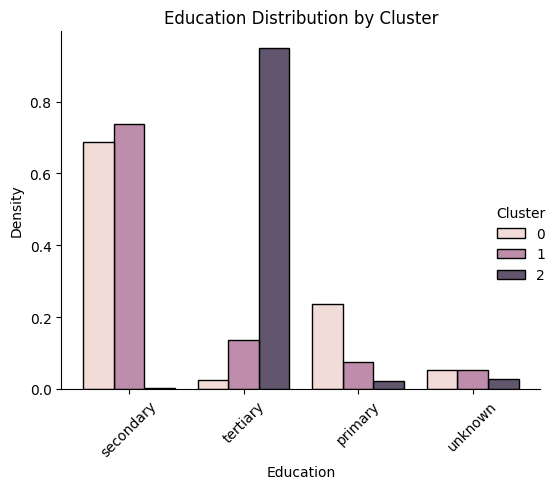

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load and preprocess the data
data = pd.read_csv("accounts.csv")
data = data.drop_duplicates().dropna()  # Remove duplicates and null values
data = data.iloc[:, :8]  # Adjust according to the number of features you want
X = pd.get_dummies(data, drop_first=True)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Ensure 'job' and 'education' columns are in the DataFrame and categorical
# Replace 'job' and 'education' with the actual column names in your DataFrame
if 'job' in data.columns and 'education' in data.columns:
    # Create the displot for 'job' feature
    plt.figure(figsize=(12, 8))
    sns.displot(data=data, x='job', hue='Cluster', multiple='dodge', stat='density', shrink=0.8, common_norm=False)
    plt.title('Job Distribution by Cluster')
    plt.xlabel('Job')
    plt.ylabel('Density')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot for 'education' feature
    plt.figure(figsize=(12, 8))
    sns.displot(data=data, x='education', hue='Cluster', multiple='dodge', stat='density', shrink=0.8, common_norm=False)
    plt.title('Education Distribution by Cluster')
    plt.xlabel('Education')
    plt.ylabel('Density')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("The DataFrame does not contain the required 'job' and 'education' columns.")

The clustering analysis revealed distinct characteristics among the three clusters based on the distributions of job types and education levels. Cluster 2 is primarily composed of individuals in management roles who tend to have tertiary education. In contrast, Clusters 0 and 1 both have a more balanced mix, with a nearly equal proportion of individuals holding secondary education. This indicates that Cluster 2 may represent more senior positions, while Clusters 0 and 1 capture a broader range of job types and education levels.